In [1]:
#===========================================#
#=== Linux OS running OK                 ===#
#=== Test iMac OS OK (needs modify path) ===#
#===========================================#
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

2024-12-29 20:13:56.514766: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
print(tf.__version__)
print(keras.__version__)

2.10.0
2.10.0


In [3]:
import tensorflow as tf
gpu_device_name = tf.test.gpu_device_name()
print(gpu_device_name)

2024-12-29 20:14:00.740705: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
#tf.test.is_gpu_available()
tf.config.list_physical_devices('GPU')

[]

In [5]:
# Listing 2.1 Loading the MNIST dataset in Keras
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [6]:
print("train_images : \n", train_images[0:1])

train_images : 
 [[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126
   136 175  26 166 255 247 127   0   0   0   0]
  [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253
   253 225 172 253 242 195  64   0   0   0   0]
  [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253
   251  93  82  82  56  39   0   0   0   0   0]
  [  0   0   0   0   0   0   0 

In [7]:
#print(type(train_labels))
#print(train_labels)
print(len(train_labels))

60000


In [8]:
# Listing 2.2 The network architecture
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))


2024-12-29 20:17:07.182689: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [9]:
# Listing 2.3 The compilation step
network.compile(optimizer='rmsprop', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])


In [10]:
# Listing 2.4 Preparing the image data
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [11]:
# Listing 2.5 Preparing the labels
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [12]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)


Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 0.2543 - accuracy: 0.9267
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1045 - accuracy: 0.9692
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0688 - accuracy: 0.9790
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0498 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0373 - accuracy: 0.9887


In [13]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print("test_loss= ", test_loss, ", test_acc= ", test_acc)


313/313 [==============================] - 1s 2ms/step - loss: 0.0677 - accuracy: 0.9796
test_loss=  0.06772378087043762 , test_acc=  0.9796000123023987


In [15]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

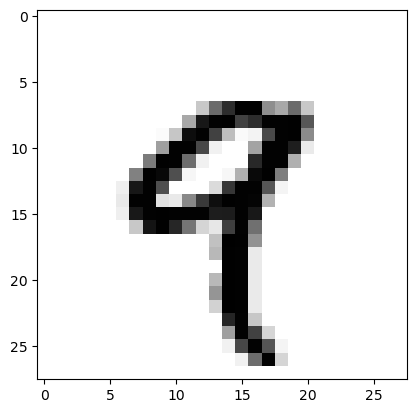

In [16]:
# Listing 2.6 Displaying the fourth digit
digit = train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
